<a href="https://colab.research.google.com/github/MuhammadAfaan/Machine-Learning_Labs/blob/main/Breast%20Cancer%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Afaan
467458
BS(DS)-1A

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [ ]:
df.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,1,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,0,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,0,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

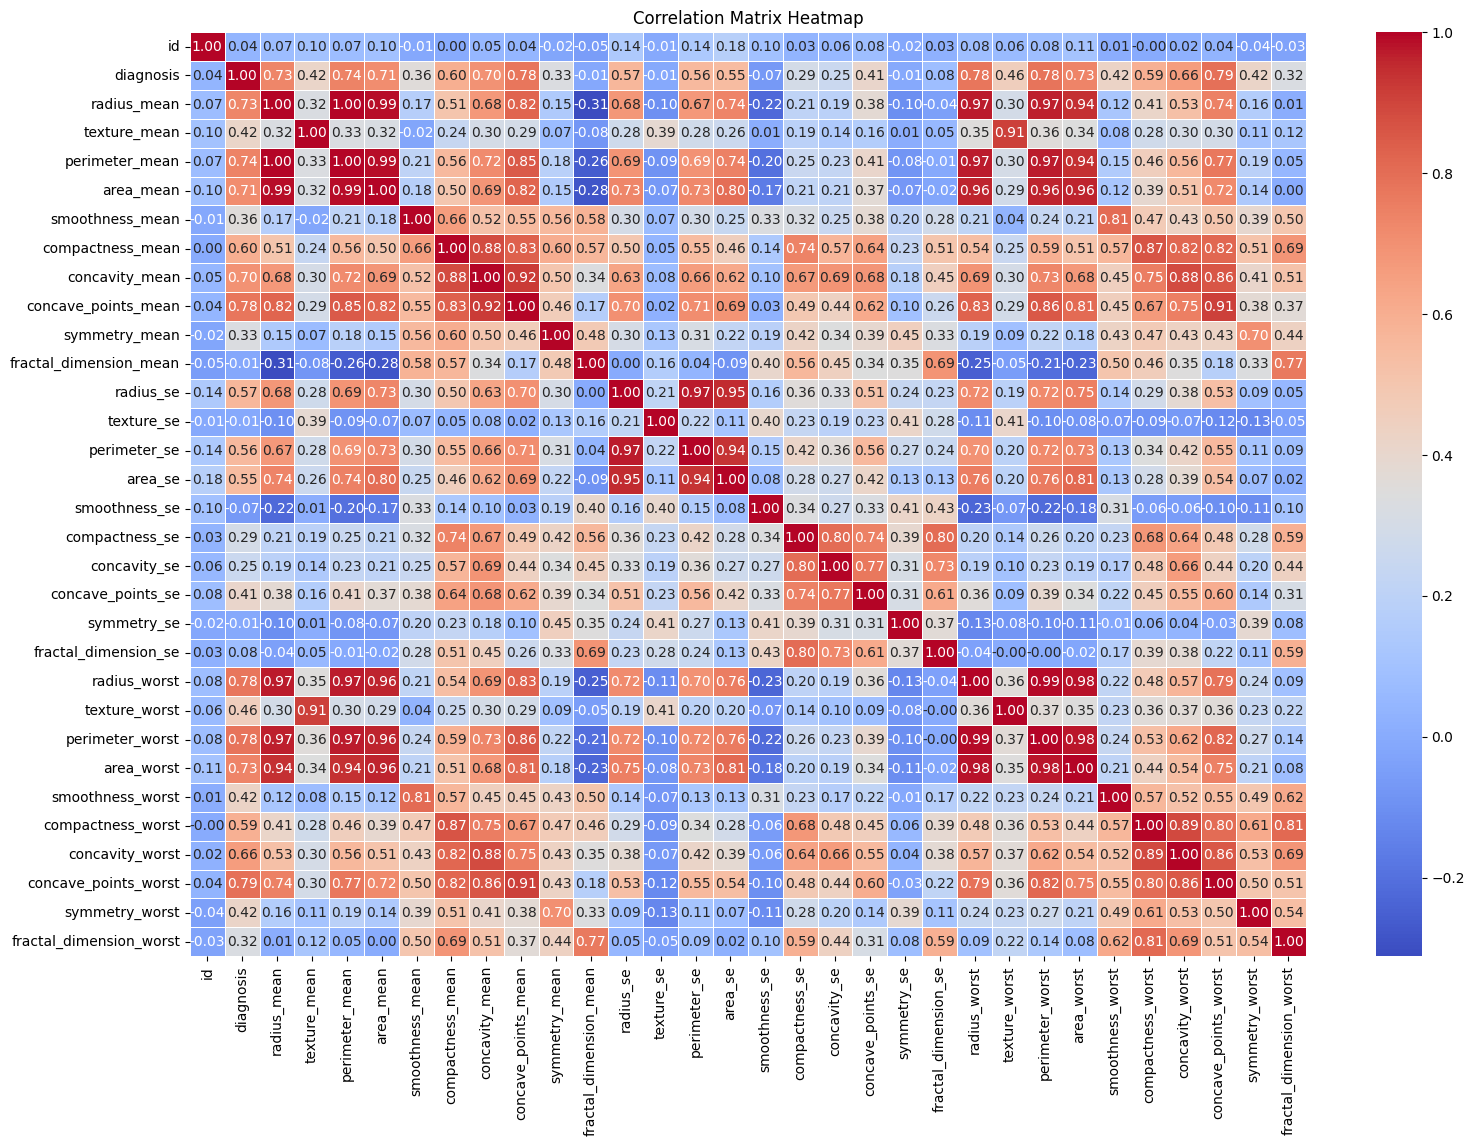

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display heatmap
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Since concave_point_worst, concave_point_mean, permieter worst having the highest corelation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['concave_points_worst', 'concave_points_mean', 'perimeter_worst']]
y = df['diagnosis']


In [ ]:
X.shape

(569, 3)

In [ ]:
y.shape

(569,)

In [ ]:
# 70/30
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#10/20
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 398 samples
Validation set: 57 samples
Test set: 114 samples


# Task#**2**

In [ ]:
def sigmoid(z):
  z = np.clip(z, -500, 500)
  return 1 / (1+np.exp(-z))


In [ ]:
def cost_function(X, y, w):

    m = len(y)
    z = np.dot(X, w)
    h = sigmoid(z)
    epsilon = 1e-10  # Small value to avoid log(0)
    cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

    return cost

In [ ]:
def compute_gradient(X, y, w):
    m = len(y)
    z = np.dot(X, w)
    h = sigmoid(z)

    gradient = (1 / m) * np.dot(X.T, (h - y))

    return gradient

In [ ]:
def gradient_descent(X, y, w, alpha, num_iters):
    cost_history = []

    for i in range(num_iters):
        gradient = compute_gradient(X, y, w)
        w -= alpha * gradient

        cost = cost_function(X, y, w)
        cost_history.append(cost)

        if i % 1000 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i}: Cost = {cost}")

    return w, cost_history

In [88]:
def compute_precision_recall(X, y, w):
    predictions = sigmoid(X @ w) >= 0.5  # Convert probabilities to 0 or 1

    TP = np.sum((predictions == 1) & (y == 1))  # True Positives
    FP = np.sum((predictions == 1) & (y == 0))  # False Positives
    FN = np.sum((predictions == 0) & (y == 1))  # False Negatives

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return precision, recall


In [89]:
# Model training function
def train_model(Xtrain, ytrain, Xval, yval, alpha, num_epochs):
    w = np.random.rand(Xtrain.shape[1])  # Initialize weights randomly

    training_loss = []
    validation_loss = []
    precision_values = []
    recall_values = []

    for epoch in range(num_epochs):
        # Compute gradient and update weights
        gradient = compute_gradient(Xtrain, ytrain, w)
        w -= alpha * gradient

        # Compute losses
        train_loss = cost_function(Xtrain, ytrain, w)
        val_loss = cost_function(Xval, yval, w)

        # Compute precision & recall
        precision, recall = compute_precision_recall(Xval, yval, w)

        # Store values for analysis
        training_loss.append(train_loss)
        validation_loss.append(val_loss)
        precision_values.append(precision)
        recall_values.append(recall)

    return w, training_loss, validation_loss, precision_values, recall_values

In [90]:
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1]  # Test different alphas
best_alpha = None
best_val_loss = float("inf")
results = {}

# trainig on multiple data values
for alpha in alpha_values:
    w, train_loss, val_loss, precision, recall = train_model(X_train, y_train, X_val, y_val, alpha, num_epochs=1000)

    results[alpha] = (train_loss, val_loss, precision, recall)

    # lowest alpha value
    if val_loss[-1] < best_val_loss:
        best_val_loss = val_loss[-1]
        best_alpha = alpha

print(f"Best alpha: {best_alpha}")

#final model
w, train_loss, val_loss, precision, recall = train_model(X_train, y_train, X_test, y_test, best_alpha, num_epochs=1000)
print(w)
print(train_loss)
print(val_loss)
print(precision)
print(recall)


Best alpha: 0.0001
[ 0.76962063  0.16042294 -0.00127069]
[3.945398250249743, 3.6474271637883287, 3.350419128457961, 3.05490730327593, 2.7617279226769123, 2.4721904697578454, 2.188331412987235, 1.913268268113462, 1.6516294145874093, 1.409913087681662, 1.1963759210997522, 1.019747267340291, 0.8862398216796629, 0.7958901980850848, 0.7414535684598705, 0.711798059652056, 0.6967553416810239, 0.6894413641476286, 0.6859627899634748, 0.6843256733734097, 0.6835588143985596, 0.6832003061135689, 0.683032823603392, 0.6829545943483724, 0.6829180497015407, 0.6829009715682411, 0.6828929844660735, 0.6828892432176068, 0.6828874850657368, 0.6828866531999568, 0.682886254010982, 0.6828860569352239, 0.6828859542731304, 0.6828858957153813, 0.6828858577607211, 0.6828858294307432, 0.6828858055969349, 0.6828857838635194, 0.6828857631113088, 0.6828857428174723, 0.682885722737768, 0.6828857027580978, 0.6828856828251599, 0.6828856629140546, 0.6828856430131495, 0.6828856231170108, 0.6828856032230999, 0.682885583330

In [93]:
import matplotlib.pyplot as plt
epochs = epochs = list(range(1, 1001))

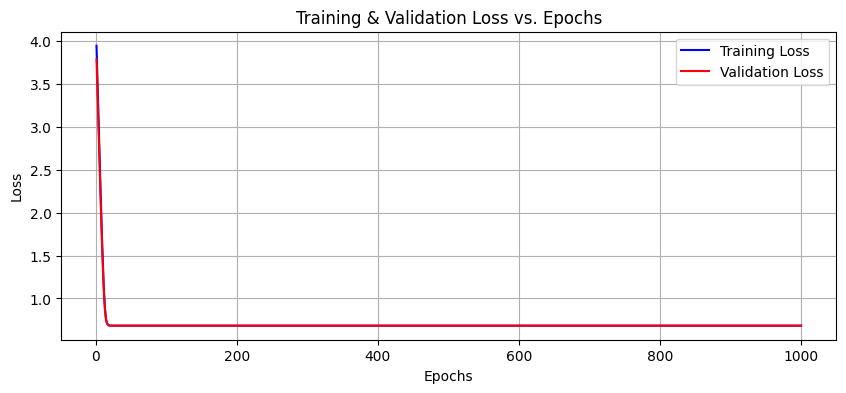

In [94]:
# Plot 1: Training Loss & Validation Loss vs. Epochs
plt.figure(figsize=(10, 4))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss vs. Epochs")
plt.legend()
plt.grid()
plt.show()

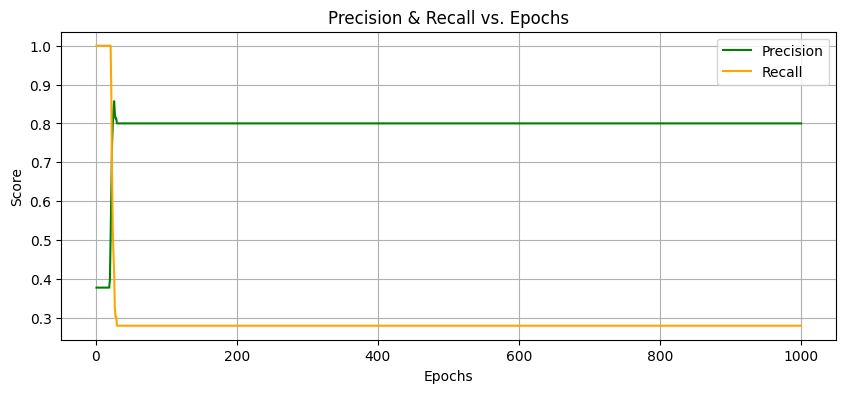

In [95]:
# Plot 2: Precision & Recall vs. Epochs
plt.figure(figsize=(10, 4))
plt.plot(epochs, precision, label="Precision", color='green')
plt.plot(epochs, recall, label="Recall", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Precision & Recall vs. Epochs")
plt.legend()
plt.grid()
plt.show()

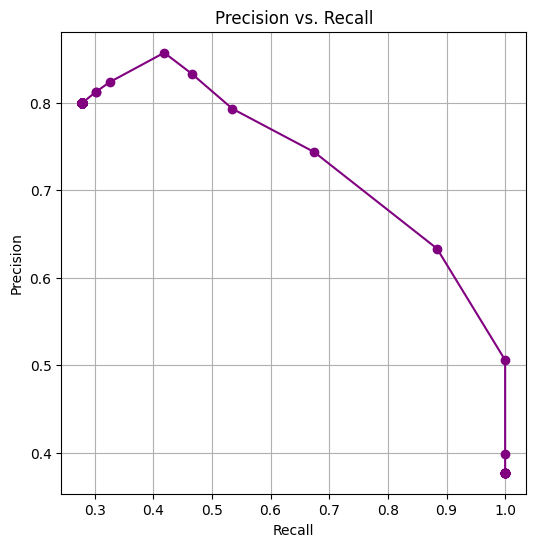

In [96]:
# Plot 3: Precision vs. Recall
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, marker="o", linestyle='-', color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall")
plt.grid()
plt.show()

In [110]:
weights = np.array([0.76962063,  0.16042294, -0.00127069])

def predict(X):
    z = np.dot(X, weights)  # linear equation
    y_pred = 1 / (1 + np.exp(-z))  # sigmoid func
    return (y_pred > 0.5).astype(int)  # boundary

test_samples = np.array([
    [0.15, 0.56, 100],  # Cancerous
    [0.12, 0.68, 105],  # Cancerous
    [0.03, 0.01, 70],   # Benign
    [0.02, 0.005, 65]   # Benign
])



# Predictions
sample_predictions = predict(test_samples)
print(sample_predictions)

[1 1 0 0]


concave_points_worst', 'concave_points_mean', 'perimeter_worst'


In [111]:
predictions = predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy}")


Accuracy on the test set: 0.7017543859649122


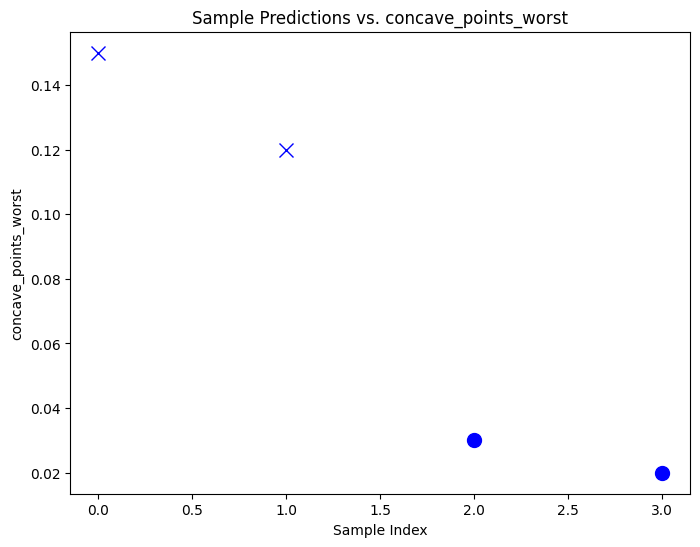

In [119]:
plt.figure(figsize=(8, 6))
for i in range(len(test_samples)):
    if sample_predictions[i] == 1:
        plt.plot(i, test_samples[i,0], marker='x', color='blue', markersize=10, linestyle='')
    else:
        plt.plot(i, test_samples[i,0], marker='o', color='blue', markersize=10, linestyle='')
plt.xlabel("Sample Index")
plt.ylabel("concave_points_worst")
plt.title("Sample Predictions vs. concave_points_worst")
plt.show()


# **Breast Cancer Classification using Logistic Regression**

**Introduction**

Breast cancer classification is an essential task in medical diagnostics. In this project, we implement a logistic regression model using NumPy to classify breast cancer data. The dataset is split into training, validation, and testing sets with a ratio of 70/10/20. The implementation includes key functions such as sigmoid activation, cost function, gradient calculation, and gradient descent optimization. The model is trained using multiple epochs, and performance is evaluated using plots and sample predictions.

**Data Preparation**

Dataset: The breast cancer dataset is preprocessed and split into three subsets:

70% for training

10% for validation

20% for testing

Conversion to NumPy Arrays: The data is transformed into NumPy arrays for efficient mathematical operations.

**Implementation**

1. Sigmoid Function

The sigmoid function is used as the activation function in logistic regression:



2. Cost Function

The cost function measures the error in prediction using binary cross-entropy:



where  is the predicted output and  is the actual label.

3. Gradient Calculation

The gradient of the cost function with respect to model parameters is computed as:



4. Gradient Descent

The gradient descent algorithm updates the model parameters iteratively:



where  is the learning rate.

5. Model Training

The model is trained using multiple epochs:

Initialize parameters.

Compute cost and gradients.

Update parameters using gradient descent.

Store results for analysis.

Results and Analysis

1. Plot of Cost Function

The cost function is plotted against epochs to observe convergence.

2. Predictions on Sample Data

After training, the model is tested with sample data to check its prediction capability.

**Conclusion**

This project successfully implements logistic regression for breast cancer classification. The use of gradient descent ensures optimal parameter updates, and the evaluation through plots validates the model's performance. Future improvements could include feature scaling, regularization, and advanced optimization techniques.